In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Aumenta el número de columnas
import numpy as np
# Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
path= "/content/drive/MyDrive/Aprendizaje no supervisador para el analisis de datos /marketing_campaign.csv" # Colocar la ubicación del archivo
datos= pd.read_csv(path,sep="\t")
datos.shape

(2240, 29)

Utilizando los datos de Marketing_campaing.csv, realice:
- Realizar un gráfico apropiado para responder a la pregunta ¿los clientes que tienen hijos, aceptan más campañas de promoción? Responda la pregunta.

- Realizar los gráficos apropiados para responder a la pregunta ¿Los clientes que realizan compras con descuento realizan más compras por catálogo, tienda física o página web? Responda la pregunta.

Todos los gráficos deben tener títulos y leyendas correspondientes a la información que se muestra.

Se entrega un archivo .ipynb con el código, gráficos y conclusiones.

In [5]:
datos=datos.dropna() # Eliminar datos faltantes

In [6]:
data=datos.copy()

In [7]:
data["Age"]= 2024-data["Year_Birth"]

In [8]:
data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response' ]].sum(axis=1) #Suma todas las columnas

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Length: 2216, dtype: int64

In [9]:
data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response' ]].sum(axis=0) #Suma todas las filas

AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    162
AcceptedCmp1    142
AcceptedCmp2     30
Response        333
dtype: int64

In [10]:
data1 = data.drop(labels=["Year_Birth", "ID", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response'], axis=1)

In [11]:
data1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,3.0,11.0,55.179603
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,0.0,0.0,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,28.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,47.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,54.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,65.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,131.000000


In [12]:
data1["NUM_CHILDREN"]= data["Kidhome"]+data["Teenhome"]
data1["NUM_CHILDREN"]
data1["NUM_CHILDREN"].value_counts()

NUM_CHILDREN
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [13]:
data1["Camp_accepted"]= data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2']+data['Response']
data1["Camp_accepted"]
data1["Camp_accepted"].value_counts()


Camp_accepted
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

1. ¿Los clientes que tienen hijos, aceptan más campañas de promoción? Responda la pregunta.

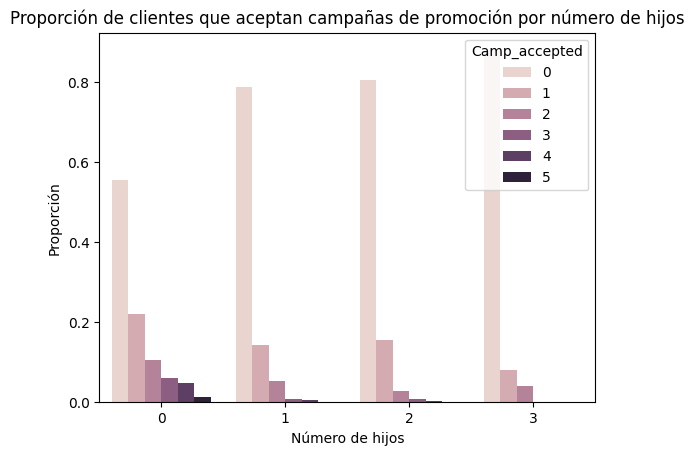

In [14]:
tabla_frecuencia_relacion = data1.groupby('NUM_CHILDREN')['Camp_accepted'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='NUM_CHILDREN', y='proportion', hue='Camp_accepted')
plt.title('Proporción de clientes que aceptan campañas de promoción por número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Proporción')
plt.show()

Los gráficos muestran que las personas que no tienen hijos tienden a aceptar más las campañas que las que tienen uno o más hijos. Además, hay una tendencía de que menor número de hijos mayor es la aceptación.

2. Realizar los gráficos apropiados para responder a la pregunta ¿Los clientes que realizan compras con descuento realizan más compras por catálogo, tienda física o página web? Responda la pregunta.

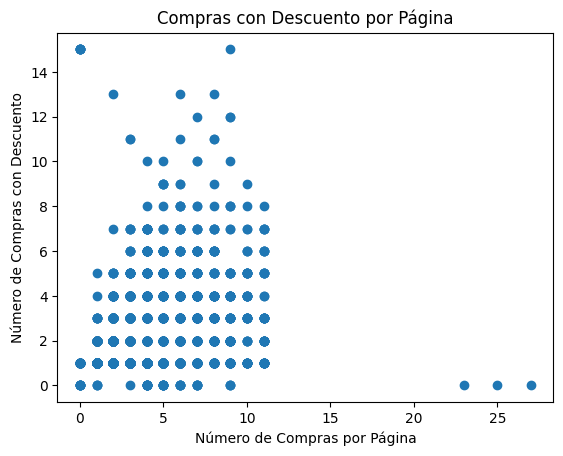

In [19]:
plt.scatter(x=data['NumWebPurchases'],y=data['NumDealsPurchases'])
plt.xlabel("Número de Compras por Página")
plt.ylabel("Número de Compras con Descuento")
plt.title("Compras con Descuento por Página")
plt.show()

La mayoría de las compras con descuento por página se concentran entre 0 y 10 y las compras con descuento se concentran en sumayoría entre 1 y 5. Hay algunos valores atípicos con alto número de compra con descuento pero son en menor valor.

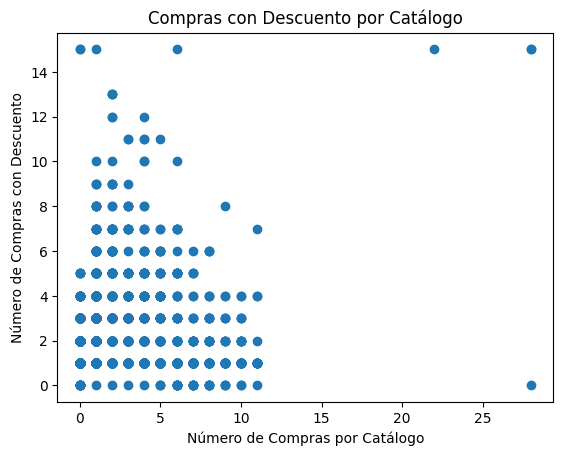

In [22]:
plt.scatter(x=data['NumCatalogPurchases'],y=data['NumDealsPurchases'])
plt.xlabel("Número de Compras por Catálogo")
plt.ylabel("Número de Compras con Descuento")
plt.title("Compras con Descuento por Catálogo")
plt.show()

La mayoría de las compras por catálogo se concentran al rededor de 10 y el número de compras con descuento se concentran entre 0 y 4. Como en el gráfico anterior también se observan valores atípicos con alto valor valor en compra de catálogo y con descuento

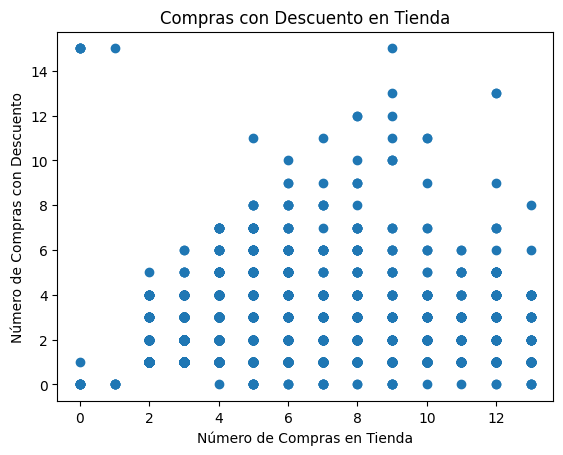

In [24]:
plt.scatter(x=data['NumStorePurchases'],y=data['NumDealsPurchases'])
plt.xlabel("Número de Compras en Tienda")
plt.ylabel("Número de Compras con Descuento")
plt.title("Compras con Descuento en Tienda")
plt.show()

Los datos en comparación con los otros dos gráficos anteriores tienen una distribución más amplia. Hay una mayor concentración de entre 4 y 12 compras en tienda y al rededor de 6 compras con descuento. Hay algunos valores atípicos pero no se encuentran tan dispersos.

Respondiendo a la pregunta parece ser que los clientes realizan más compras con descuento en la tienda física en comparación con el catálogo y la página web